In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_data = pd.read_csv('./iris.csv')
X = iris_data.iloc[:,:4]
iris_data.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(iris_data.Species)
iris_data['lables'] = labels

In [4]:
# 聚类算法库
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2).fit(X)
km3 = KMeans(n_clusters=3).fit(X)

In [5]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
iris_data['clusters'] = km.labels_
iris_data['clusters3'] = km3.labels_

In [7]:
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,lables,clusters,clusters3
0,5.1,3.5,1.4,0.2,setosa,0,0,1
1,4.9,3.0,1.4,0.2,setosa,0,0,1
2,4.7,3.2,1.3,0.2,setosa,0,0,1
3,4.6,3.1,1.5,0.2,setosa,0,0,1
4,5.0,3.6,1.4,0.2,setosa,0,0,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,1,2
146,6.3,2.5,5.0,1.9,virginica,2,1,0
147,6.5,3.0,5.2,2.0,virginica,2,1,2
148,6.2,3.4,5.4,2.3,virginica,2,1,2


In [8]:
iris_data.sort_values('clusters3')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,lables,clusters,clusters3
74,6.4,2.9,4.3,1.3,versicolor,1,1,0
83,6.0,2.7,5.1,1.6,versicolor,1,1,0
82,5.8,2.7,3.9,1.2,versicolor,1,1,0
81,5.5,2.4,3.7,1.0,versicolor,1,1,0
80,5.5,2.4,3.8,1.1,versicolor,1,1,0
...,...,...,...,...,...,...,...,...
120,6.9,3.2,5.7,2.3,virginica,2,1,2
122,7.7,2.8,6.7,2.0,virginica,2,1,2
124,6.7,3.3,5.7,2.1,virginica,2,1,2
110,6.5,3.2,5.1,2.0,virginica,2,1,2


In [9]:
# 可视化
# 中心点
center_point = iris_data.groupby('clusters')['Sepal.Length'].count()
iris_data.groupby('clusters3')['Sepal.Length'].count()

clusters3
0    62
1    50
2    38
Name: Sepal.Length, dtype: int64

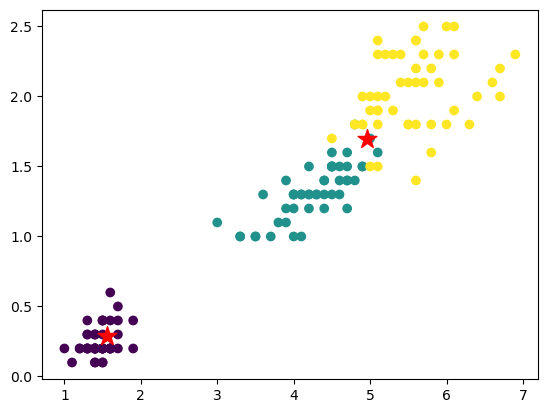

In [10]:
# 寻找质心点
center_point_2 = iris_data.groupby('clusters').mean()
# 绘制聚类图
c_lists = ['red','blue','green']
plt.scatter(iris_data['Petal.Length'],iris_data['Petal.Width'],c=iris_data['lables'])
plt.scatter(center_point_2['Petal.Length'],center_point_2['Petal.Width'],marker='*',s=200,c='red')

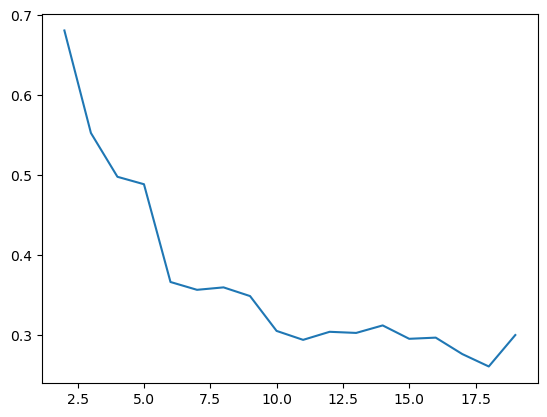

In [11]:
# 轮廓系数（自己看看）
from sklearn import metrics
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X,labels)
    scores.append(score)
plt.plot(list(range(2,20)),scores)

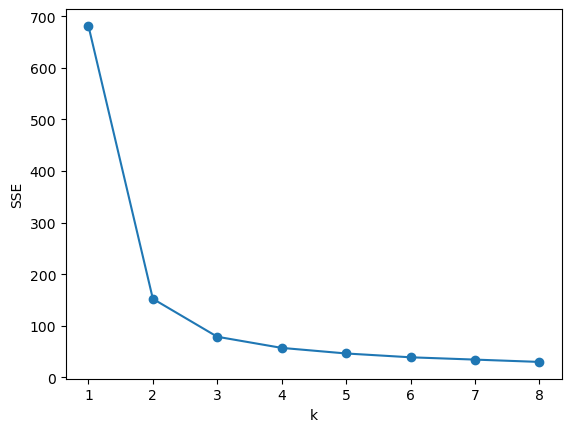

In [13]:
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    SSE.append(estimator.inertia_) # estimator.inertia_获取聚类准则的总和
x = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(x,SSE,'o-')
plt.savefig('szf.pdf')
plt.show()